In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/NF_SUBAVG_LOS")
except:
    print("NF_SUBAVG_LOS dir exists.")

#For testing, leave commented
swivel = 0
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]

desired_file_prefix = "NF_LOS" 

normalize_data=True

by_year = 1
lnconvert=False
 

NF_SUBAVG_LOS dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        desired_file_output = "./NF_SUBAVG_GENDER/NF_GENDER_" + str(2011+year) + "_"    
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
NF_LOS_3to11mos_all.csv
NF_LOS_5plus_all.csv
NF_LOS_ltg3mos_all.csv
NF_LOS_1to5yr_all.csv
NF_LOS_NR_all.csv
dict_keys(['NF_LOS_3to11mos', 'NF_LOS_5plus', 'NF_LOS_ltg3mos', 'NF_LOS_1to5yr', 'NF_LOS_NR'])
code_found: 11-0000:Management Occupations
*gt(adding): NF_LOS_3to11mos_112000
*gt(adding): NF_LOS_3to11mos_113000
*gt(adding): NF_LOS_3to11mos_113120
*gt(adding): NF_LOS_3to11mos_119000
*gt(adding): NF_LOS_3to11mos_119110
code_found: 11-0000:Management Occupations
*gt(adding): NF_LOS_5plus_112000
*gt(adding): NF_LOS_5plus_113000
*gt(adding): NF_LOS_5plus_113110
*gt(adding): NF_LOS_5plus_119000
*gt(adding): NF_LOS_5plus_119110
code_found: 11-0000:Management Occupations
*gt(adding): NF_LOS_ltg3mos_112000
*gt(addi

# SAMPLE STRUCTURE

In [8]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_NF_LOS_3to11mos_111000-Management Occupations', [0.001038961038961039, 0.0010265924551638838, 0.0010265924551638838]]
['2011_NF_LOS_3to11mos_112000-Management Occupations', [0.0003463203463203463, 0.0003215831787260359, 2.4737167594310453e-05, 0.0002968460111317254]]
['2011_NF_LOS_3to11mos_113000-Management Occupations', [0.00027210884353741496, 0.00013605442176870748, 0.00013605442176870748, 2.4737167594310453e-05, 2.4737167594310453e-05, 4.9474335188620906e-05, 4.9474335188620906e-05]]
['2011_NF_LOS_3to11mos_113120-Management Occupations', [0, 0, 0, 0]]
['2011_NF_LOS_3to11mos_119000-Management Occupations', [0.002733457019171305, 8.658008658008658e-05, 8.658008658008658e-05, 6.184291898577613e-05, 6.184291898577613e-05, 7.421150278293135e-05, 4.9474335188620906e-05, 2.4737167594310453e-05, 0.0008905380333951762, 0.0008905380333951762]]
['2011_NF_LOS_3to11mos_119110-Management Occupations', [0.00045763760049474334, 0.00045763760049474334, 0.0005936920222634508, 0.00059369202226

In [9]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0, 0, 0, 0]]


In [10]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [11]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['NF', 'LOS']
NF_LOS


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53', '_ F']
../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_110000_Management_Occupations_time_plots_.png


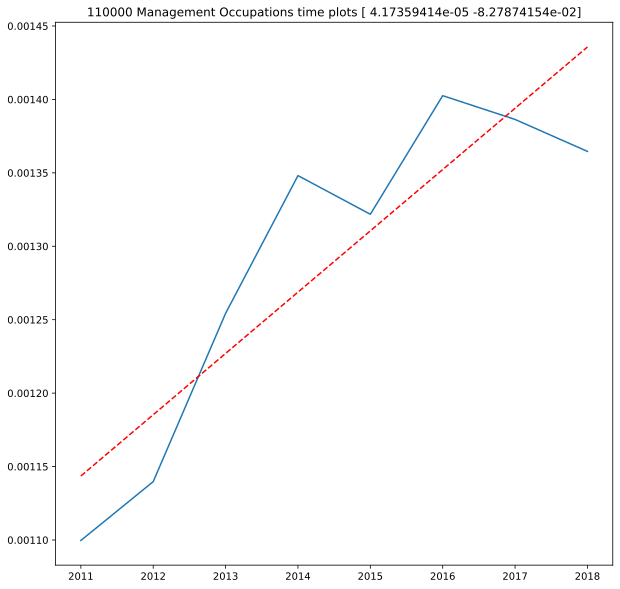

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


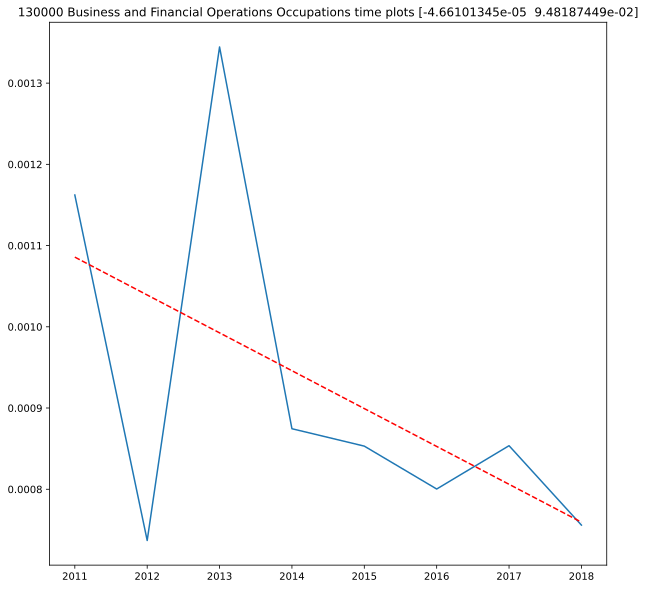

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


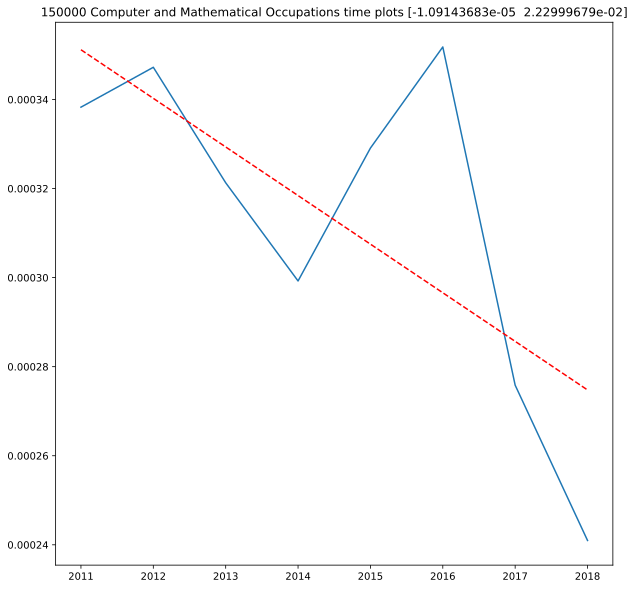

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


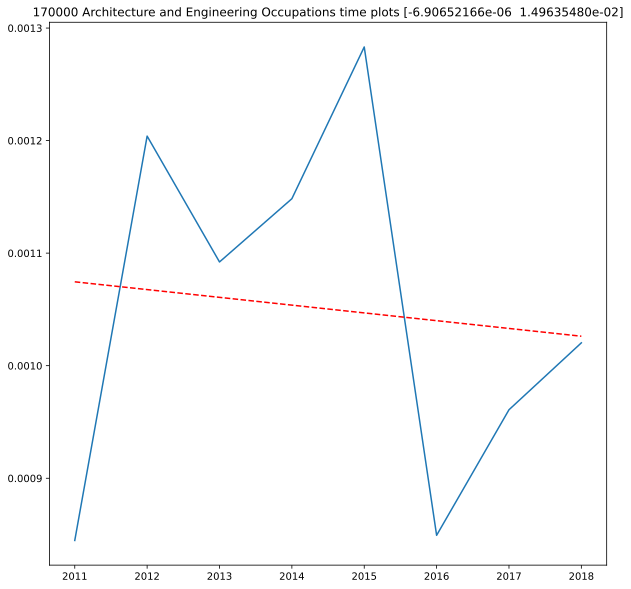

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


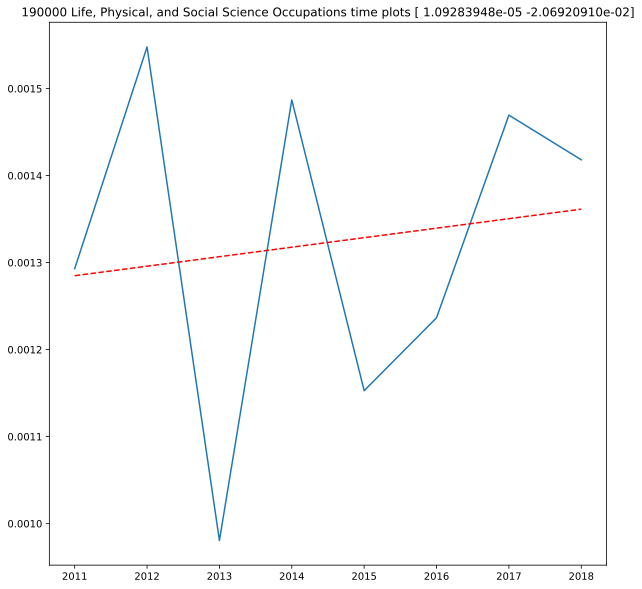

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


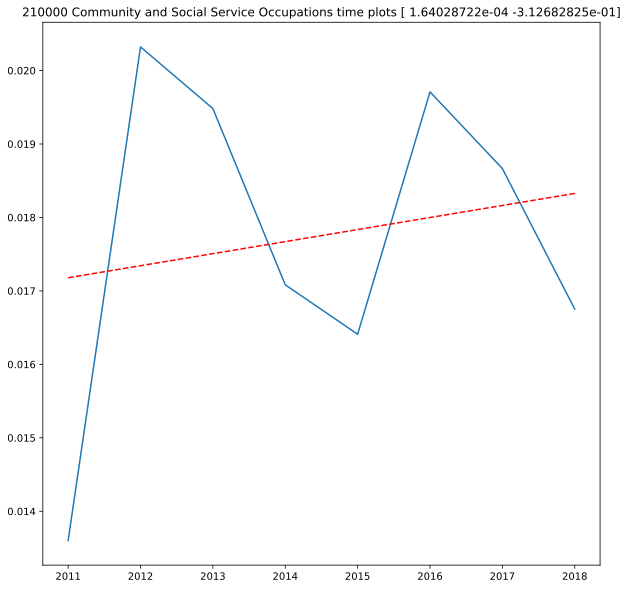

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_230000_Legal_Occupations_time_plots_.png


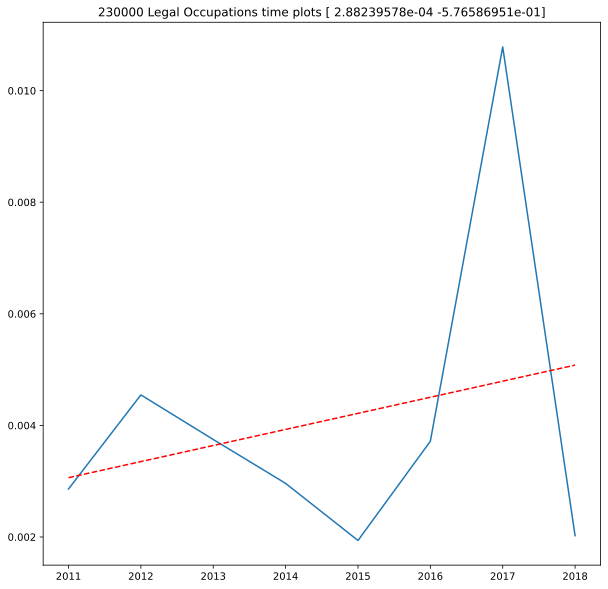

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


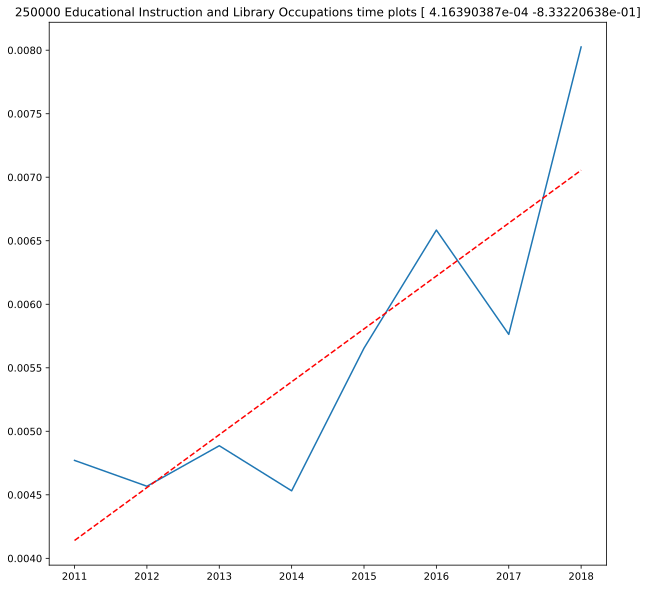

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


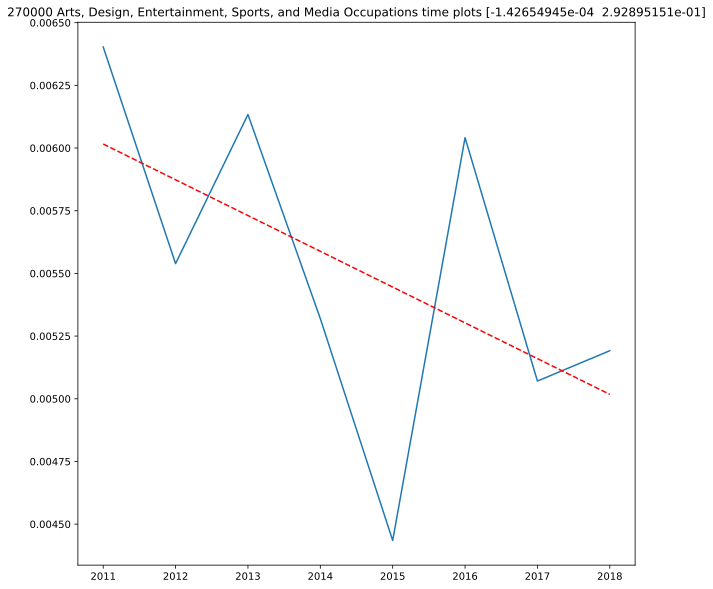

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


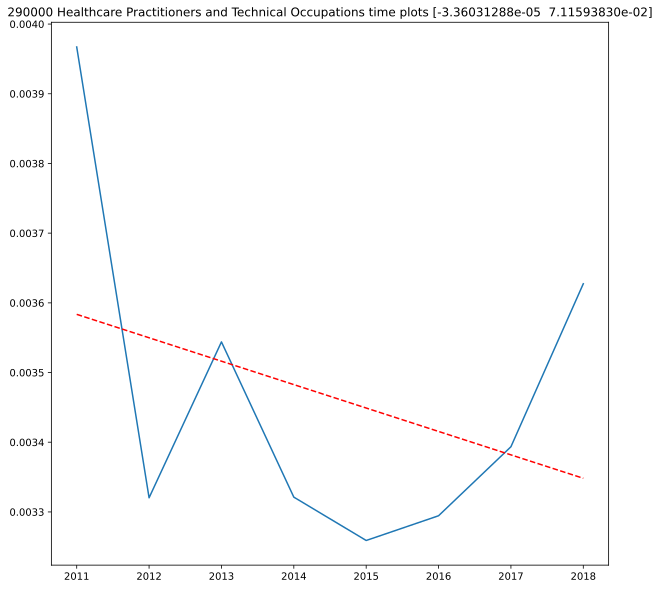

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_310000_Healthcare_Support_Occupations_time_plots_.png


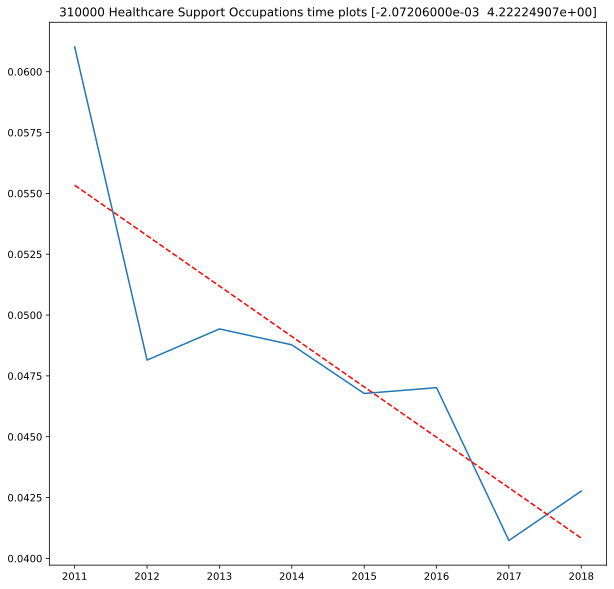

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_330000_Protective_Service_Occupations_time_plots_.png


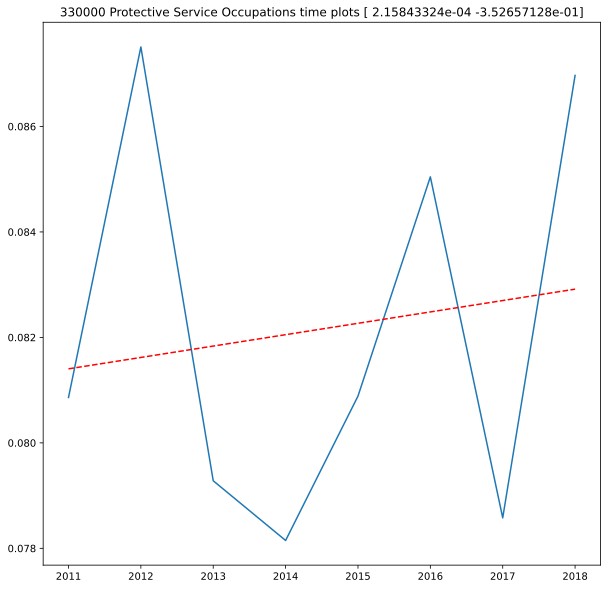

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


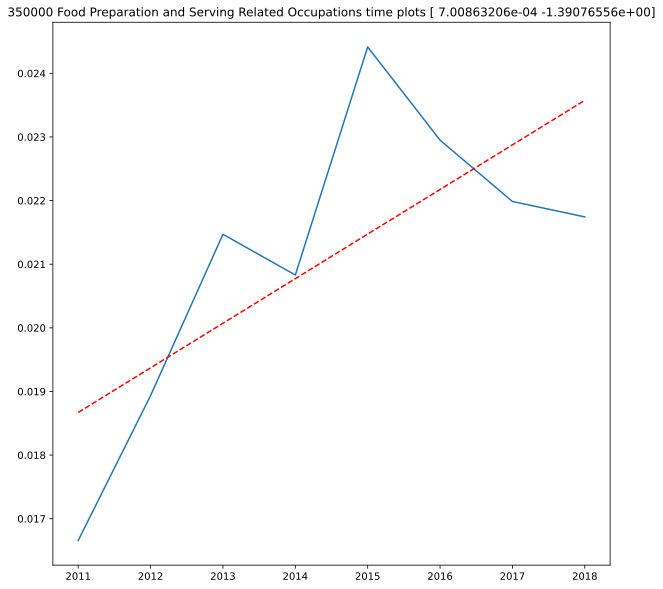

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


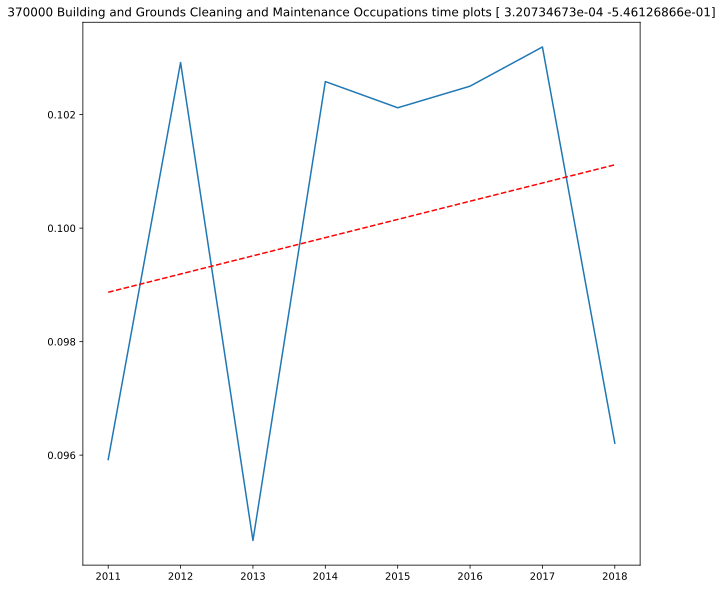

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


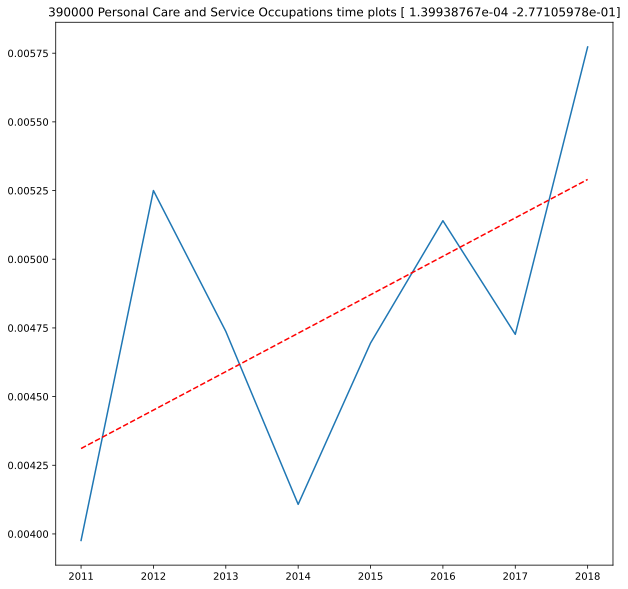

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_410000_Sales_and_Related_Occupations_time_plots_.png


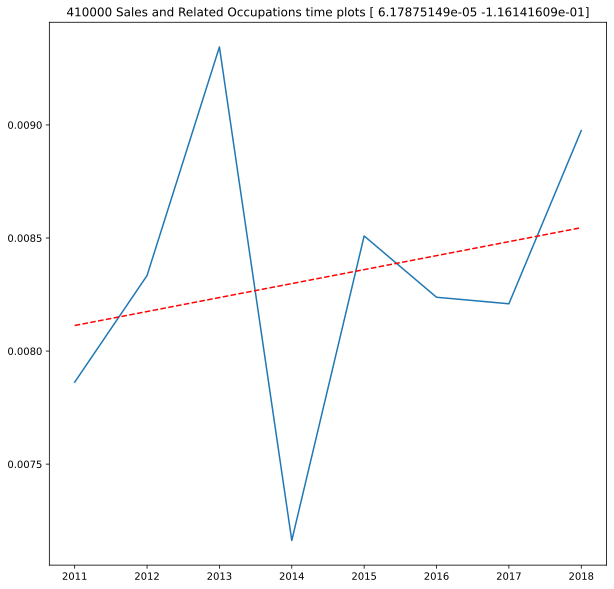

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


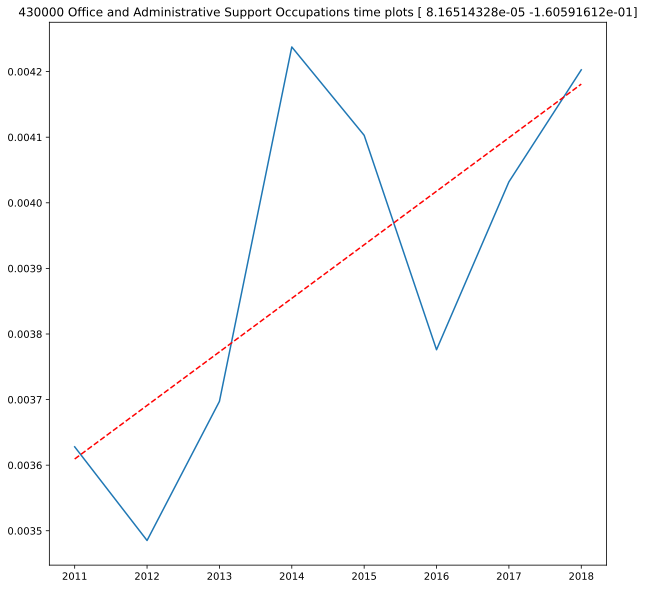

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


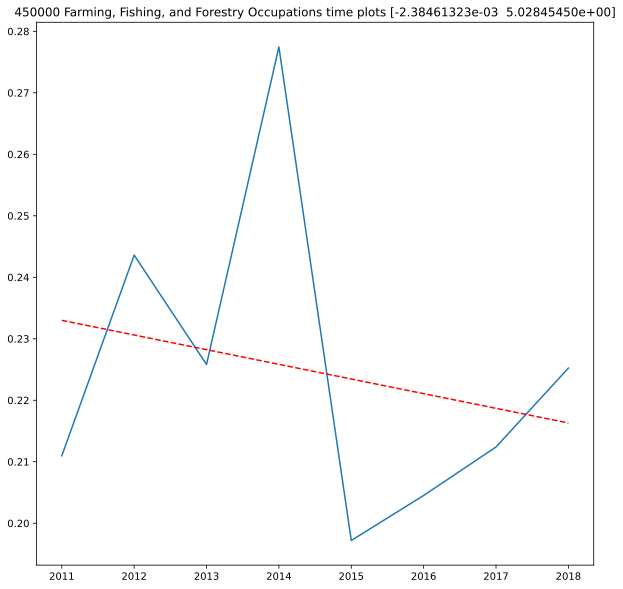

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


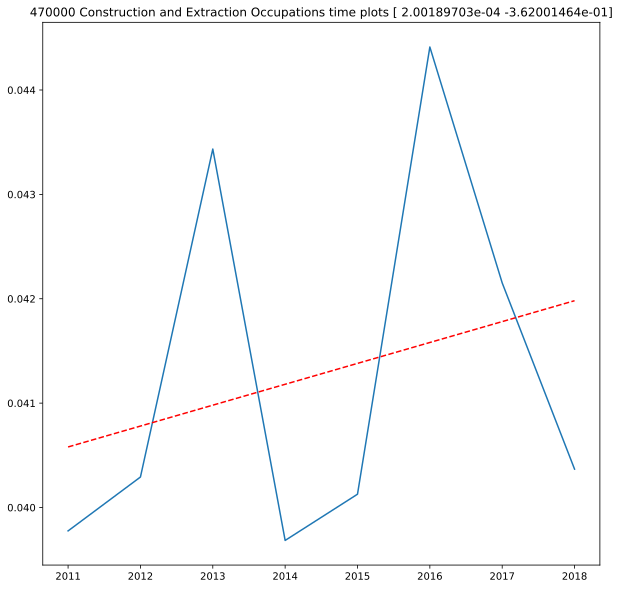

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


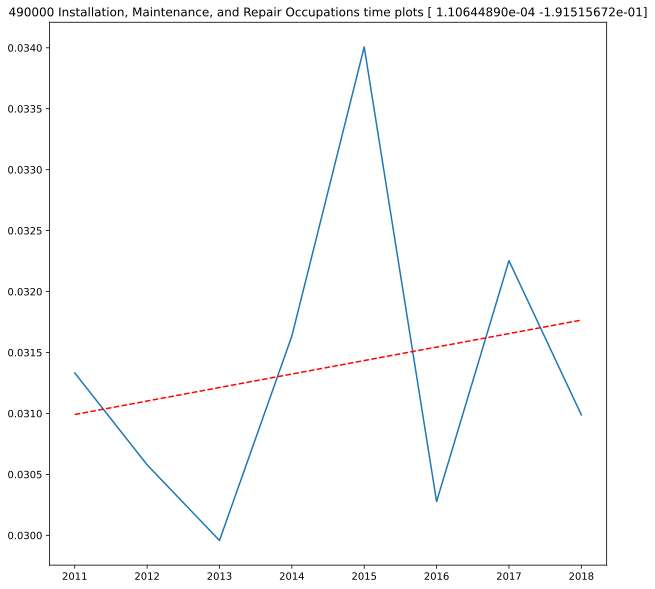

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_510000_Production_Occupations_time_plots_.png


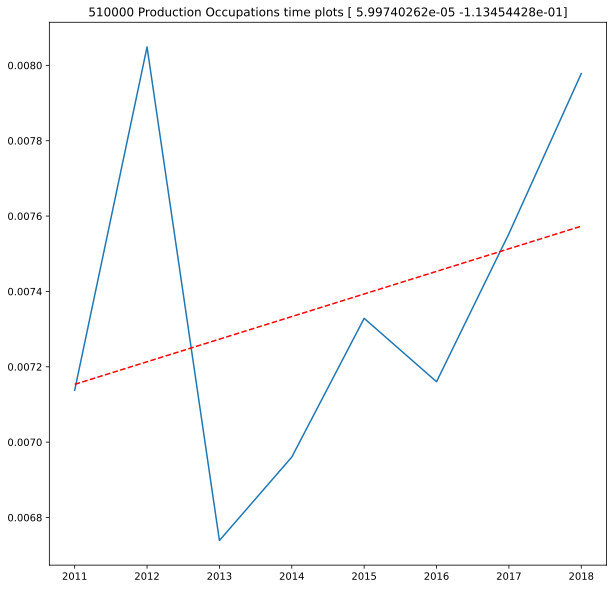

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


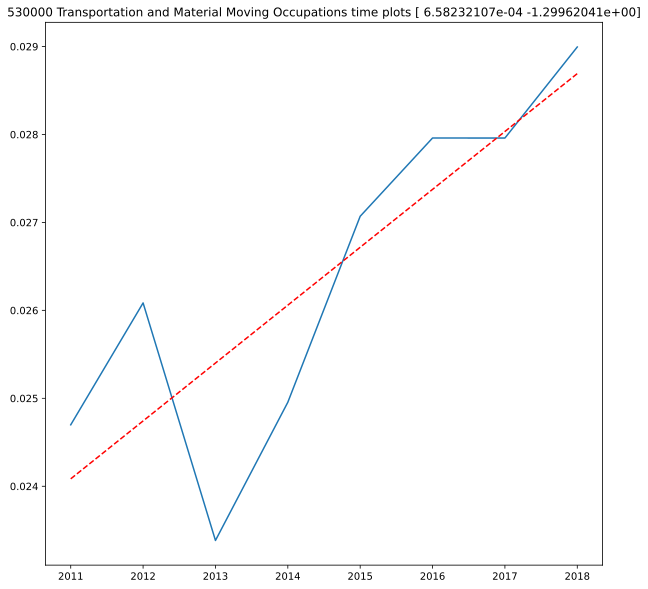

/tmp/ipykernel_3845645/3854298858.py:55: RuntimeWarning: Mean of empty slice.
  omean = np.array(tmp_lst).mean()
/home/ediaz/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


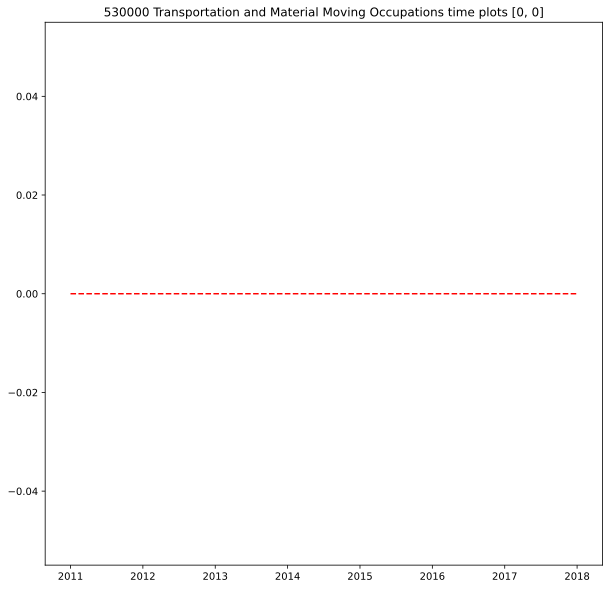

In [12]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()

In [13]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y =  0.00004174 x + -0.08278742  : 110000 Management Occupations 
 y = -0.00004661 x +  0.09481874  : 130000 Business and Financial Operations Occupations 
 y = -0.00001091 x +  0.02229997  : 150000 Computer and Mathematical Occupations 
 y = -0.00000691 x +  0.01496355  : 170000 Architecture and Engineering Occupations 
 y =  0.00001093 x + -0.02069209  : 190000 Life, Physical, and Social Science Occupations 
 y =  0.00016403 x + -0.31268283  : 210000 Community and Social Service Occupations 
 y =  0.00028824 x + -0.57658695  : 230000 Legal Occupations 
 y =  0.00041639 x + -0.83322064  : 250000 Educational Instruction and Library Occupations 
 y = -0.00014265 x +  0.29289515  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00003360 x +  0.07115938  : 290000 Healthcare Practitioners and Technical Occupations 
 y = -0.00207206 x +  4.22224907  : 310000 Healthcare Support Occupations 
 y =  0.00021584 x + -0.35265713  : 330000 Protective Service Occupations

# CALC COV 

In [14]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    
    if math.isnan(ocov):
        ocov = 0.0
    
    #ocov.append(str(use_case),ocov)
    print(use_case,ocov)

    cov_array.append([str(use_case),ocov])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53', '_ F']
110000 Management Occupations 0.08314209110229612
130000 Business and Financial Operations Occupations 0.21830821760983435
150000 Computer and Mathematical Occupations 0.11521712272934463
170000 Architecture and Engineering Occupations 0.14312072090961706
190000 Life, Physical, and Social Science Occupations 0.1369141761029585
210000 Community and Social Service Occupations 0.11735231207159327
230000 Legal Occupations 0.6552999403766238
250000 Educational Instruction and Library Occupations 0.20256213068579237
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.11018203670422341
290000 Healthcare Practitioners and Technical Occupations 0.0647563579149374
310000 Healthcare Support Occupations 0.11733266260756807
330000 Protective Service Occupations 0.043150658540698925
350000 Food Preparation and Serving Relate

/tmp/ipykernel_3845645/746082754.py:58: RuntimeWarning: Mean of empty slice.
  omean = np.array(tmp_lst).mean()


In [15]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0000000 	 530000 Transportation and Material Moving Occupations 
0.0348929 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0386468 	 490000 Installation, Maintenance, and Repair Occupations 
0.0412118 	 470000 Construction and Extraction Occupations 
0.0431507 	 330000 Protective Service Occupations 
0.0593820 	 510000 Production Occupations 
0.0647564 	 290000 Healthcare Practitioners and Technical Occupations 
0.0683215 	 430000 Office and Administrative Support Occupations 
0.0686142 	 530000 Transportation and Material Moving Occupations 
0.0745254 	 410000 Sales and Related Occupations 
0.0831421 	 110000 Management Occupations 
0.1061608 	 350000 Food Preparation and Serving Related Occupations 
0.1072627 	 450000 Farming, Fishing, and Forestry Occupations 
0.1101820 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.1151085 	 390000 Personal Care and Service Occupations 
0.1152171 	 150000 Computer and Mathematical Occupations 
0.11733

# MEAN

In [16]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53', '_ F']
110000 Management Occupations 0.0012896386652573168
130000 Business and Financial Operations Occupations 0.0009226290065946068
150000 Computer and Mathematical Occupations 0.00031297290170651947
170000 Architecture and Engineering Occupations 0.001050360143336343
190000 Life, Physical, and Social Science Occupations 0.001323160419414383
210000 Community and Social Service Occupations 0.01775304014100631
230000 Legal Occupations 0.004071678023393956
250000 Educational Instruction and Library Occupations 0.005597796659444045
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.005516764947834263
290000 Healthcare Practitioners and Technical Occupations 0.0034658799460408783
310000 Healthcare Support Occupations 0.048084214138921576
330000 Protective Service Occupations 0.08215924862990563
350000 Food Preparation a

/tmp/ipykernel_3845645/4165438231.py:58: RuntimeWarning: Mean of empty slice.
  omean = np.array(tmp_lst).mean()


In [17]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0003130 	 150000 Computer and Mathematical Occupations 
0.0009226 	 130000 Business and Financial Operations Occupations 
0.0010504 	 170000 Architecture and Engineering Occupations 
0.0012896 	 110000 Management Occupations 
0.0013232 	 190000 Life, Physical, and Social Science Occupations 
0.0034659 	 290000 Healthcare Practitioners and Technical Occupations 
0.0038952 	 430000 Office and Administrative Support Occupations 
0.0040717 	 230000 Legal Occupations 
0.0048007 	 390000 Personal Care and Service Occupations 
0.0055168 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0055978 	 250000 Educational Instruction and Library Occupations 
0.0073632 	 510000 Production Occupations 
0.0083293 	 410000 Sales and Related Occupations 
0.0177530 	 210000 Community and Social Service Occupations 
0.0211234 	 350000 Food Preparation and Serving Related Occupations 
0.0263882 	 530000 Transportation and Material Moving Occupations 
0.0313785 	 490000 Installation, Ma

# COV LEVEL 3

In [19]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3120', '_3190', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3960', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4320', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4391', '_4510', '_4520', '_4540', '_4530', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [20]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

111000 Management Occupations 0.23287478884089713
112000 Management Occupations 0.3782005096929383
113000 Management Occupations 0.2543025889481231
113100 Management Occupations 0.8610314791720178
119000 Management Occupations 0.18781124653494075
119100 Management Occupations 0.21081964632655772
131000 Business and Financial Operations Occupations 0.3516324075995468
131100 Business and Financial Operations Occupations 0.12832549465773313
132000 Business and Financial Operations Occupations 0.5663030929809415
151100 Computer and Mathematical Occupations 0.1292009419025488
152000 Computer and Mathematical Occupations 0.6251484250177479
171000 Architecture and Engineering Occupations 1.0364155212736959
172000 Architecture and Engineering Occupations 0.37627191421328393
172100 Architecture and Engineering Occupations 0.4837924647191694
173000 Architecture and Engineering Occupations 0.30190822370864456
191000 Life, Physical, and Social Science Occupations 0.30634608874518693
192000 Life, P

In [21]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0535045 	 372000 Building and Grounds Cleaning and Maintenance Occupations 
0.0559806 	 472000 Construction and Extraction Occupations 
0.0604436 	 412000 Sales and Related Occupations 
0.0609857 	 533000 Transportation and Material Moving Occupations 
0.0683931 	 292000 Healthcare Practitioners and Technical Occupations 
0.0693817 	 332000 Protective Service Occupations 
0.0702449 	 291000 Healthcare Practitioners and Technical Occupations 
0.0738379 	 512000 Production Occupations 
0.0820370 	 499000 Installation, Maintenance, and Repair Occupations 
0.0852215 	 513000 Production Occupations 
0.0863394 	 514000 Production Occupations 
0.0869954 	 532000 Transportation and Material Moving Occupations 
0.0881533 	 373000 Building and Grounds Cleaning and Maintenance Occupations 
0.0918049 	 359000 Food Preparation and Serving Related Occupations 
0.0944502 	 311000 Healthcare Support Occupations 
0.0971829 	 291100 Healthcare Practitioners and Technical Occupations 
0.1018660 	 49300

# VARIANCE ACROSS AGE

In [22]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [35]:

cases = ["ltg3mos","3to11mos","1to5yr","5plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    cov_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

0.2362517 	 ltg3mos 110000 Management Occupations 
0.4796981 	 ltg3mos 130000 Business and Financial Operations Occupations 
0.5248362 	 ltg3mos 150000 Computer and Mathematical Occupations 
0.2733635 	 ltg3mos 170000 Architecture and Engineering Occupations 
0.3489028 	 ltg3mos 190000 Life, Physical, and Social Science Occupations 
0.2457971 	 ltg3mos 210000 Community and Social Service Occupations 
1.6021252 	 ltg3mos 230000 Legal Occupations 
0.3685212 	 ltg3mos 250000 Educational Instruction and Library Occupations 
0.2241846 	 ltg3mos 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0925502 	 ltg3mos 290000 Healthcare Practitioners and Technical Occupations 
0.1515333 	 ltg3mos 310000 Healthcare Support Occupations 
0.1526977 	 ltg3mos 330000 Protective Service Occupations 
0.1359594 	 ltg3mos 350000 Food Preparation and Serving Related Occupations 
0.0849947 	 ltg3mos 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1418350 	 ltg3mos 390000 

In [36]:
print(len(mult_array))

4


../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Coef_by_Length_of_Service.png


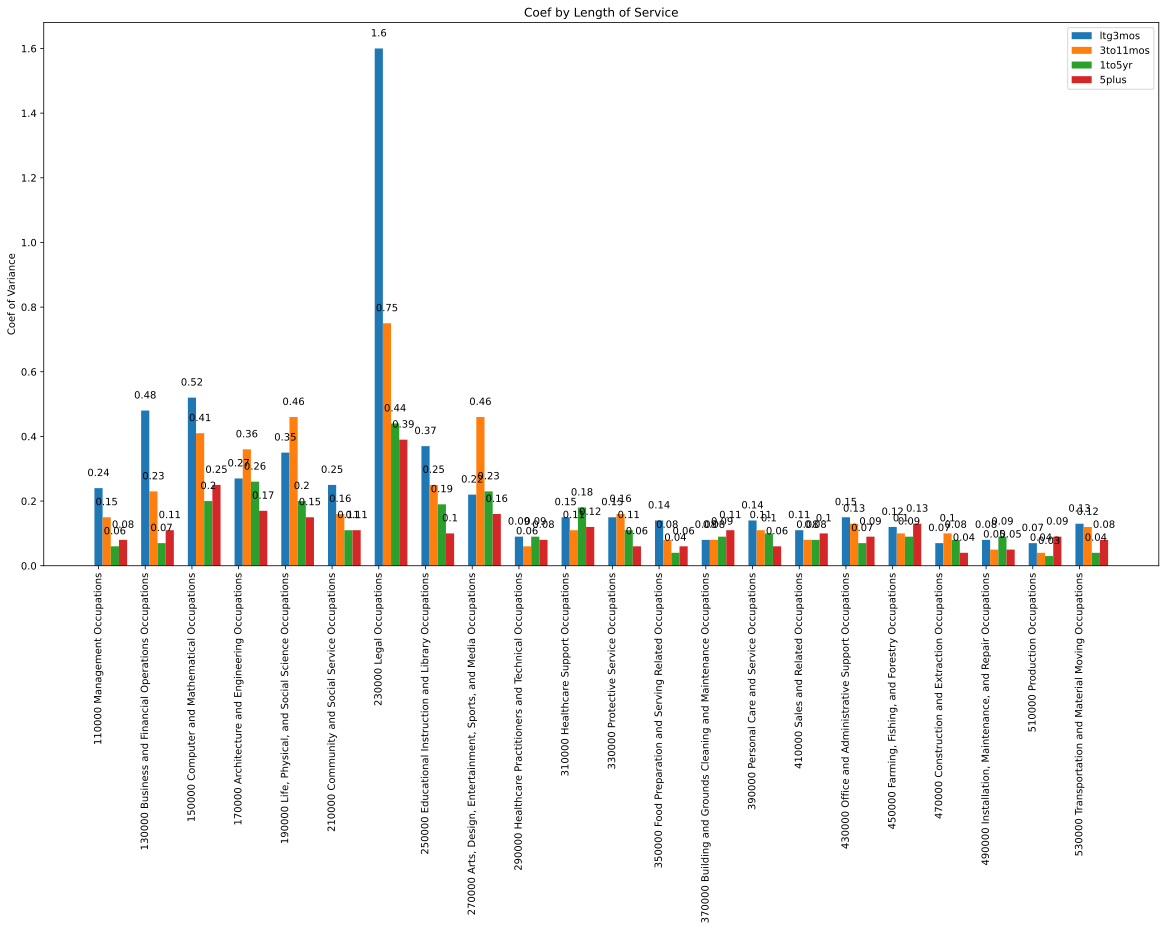

In [37]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)

title = "Coef by Length of Service"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    
    
    

# MEAN ACROSS AGE

In [38]:

cases = ["ltg3mos","3to11mos","1to5yr","5plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0033369 	 ltg3mos 110000 Management Occupations 
0.0038317 	 ltg3mos 130000 Business and Financial Operations Occupations 
0.0006482 	 ltg3mos 150000 Computer and Mathematical Occupations 
0.0035079 	 ltg3mos 170000 Architecture and Engineering Occupations 
0.0049155 	 ltg3mos 190000 Life, Physical, and Social Science Occupations 
0.0575039 	 ltg3mos 210000 Community and Social Service Occupations 
0.0095773 	 ltg3mos 230000 Legal Occupations 
0.0164030 	 ltg3mos 250000 Educational Instruction and Library Occupations 
0.0259336 	 ltg3mos 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0110614 	 ltg3mos 290000 Healthcare Practitioners and Technical Occupations 
0.1849773 	 ltg3mos 310000 Healthcare Support Occupations 
0.2285595 	 ltg3mos 330000 Protective Service Occupations 
0.0781870 	 ltg3mos 350000 Food Preparation and Serving Related Occupations 
0.3256747 	 ltg3mos 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0191583 	 ltg3mos 390000 

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Mean_Injury_by_AGE.png


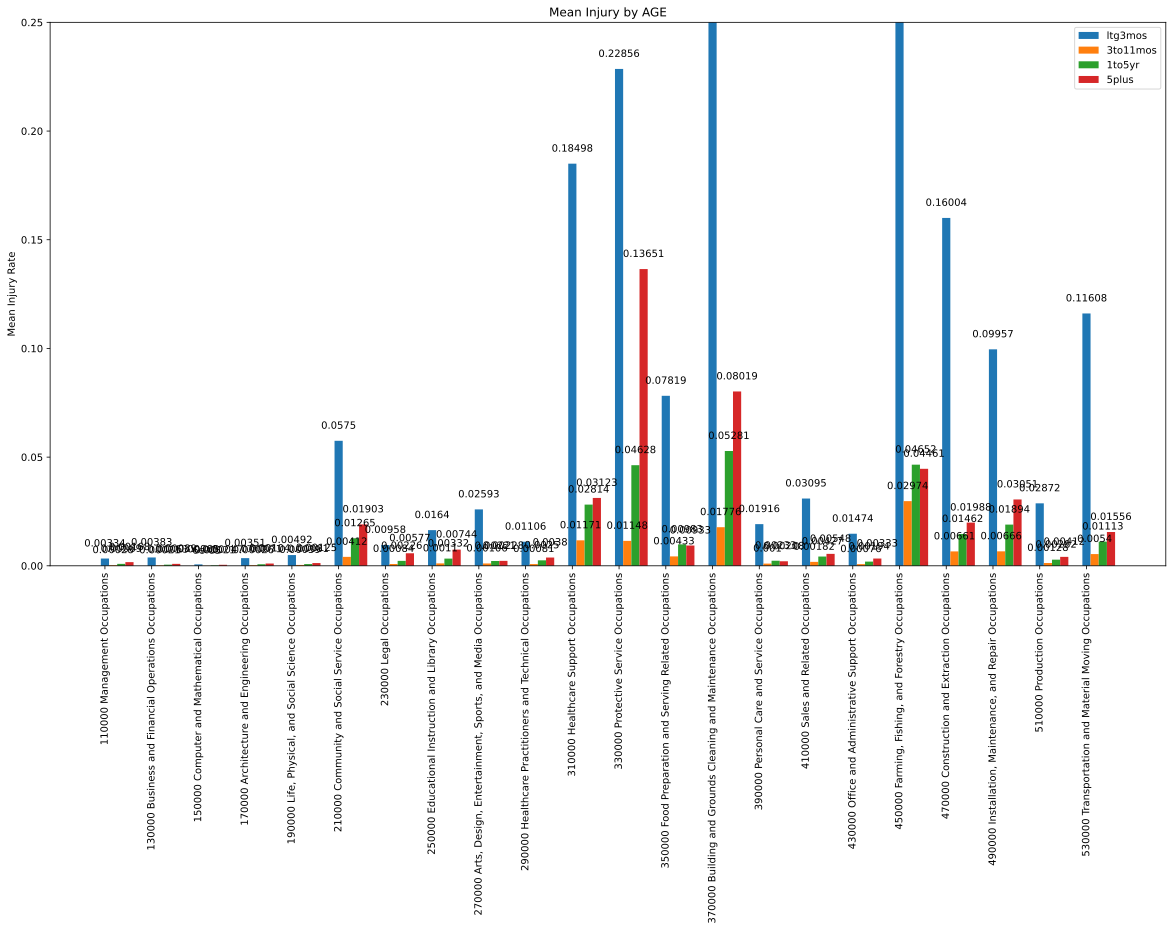

In [44]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,5)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)

title = "Mean Injury by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    
    